Accuracy: 1.00
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        17
         1.0       1.00      1.00      1.00        13

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



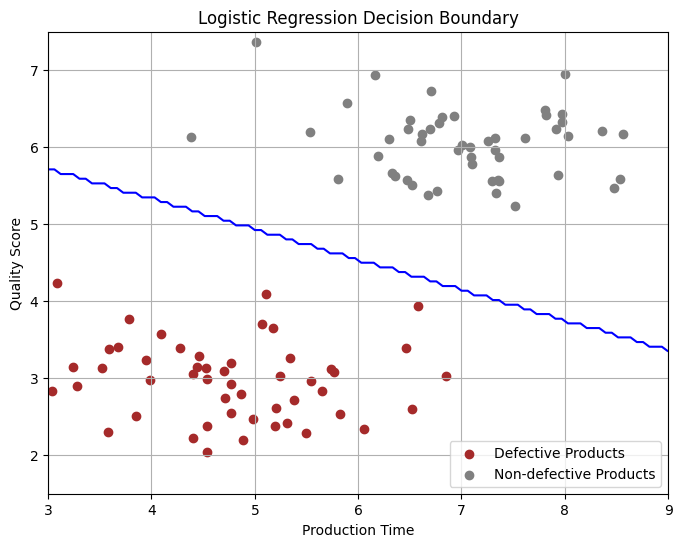

In [ ]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

np.random.seed(42)
feature1_defective = np.random.normal(5, 1, 50)
feature1_non_defective = np.random.normal(7, 1, 50)

feature2_defective = np.random.normal(3, 0.5, 50)
feature2_non_defective = np.random.normal(6, 0.5, 50)

X_defective = np.column_stack((feature1_defective, feature2_defective))
X_non_defective = np.column_stack((feature1_non_defective, feature2_non_defective))

X = np.vstack((X_defective, X_non_defective))

y = np.hstack((np.zeros(50), np.ones(50)))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print(classification_report(y_test, y_pred))

plt.figure(figsize=(8, 6))

plt.scatter(X_defective[:, 0], X_defective[:, 1], color='brown', label='Defective Products')

plt.scatter(X_non_defective[:, 0], X_non_defective[:, 1], color='gray', label='Non-defective Products')

xx, yy = np.meshgrid(np.linspace(3, 9, 100), np.linspace(1.5, 7.5, 100))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contour(xx, yy, Z, levels=[0.5], colors='blue')

plt.xlabel('Production Time')
plt.ylabel('Quality Score')
plt.title('Logistic Regression Decision Boundary')
plt.legend()

plt.grid(True)
plt.show()


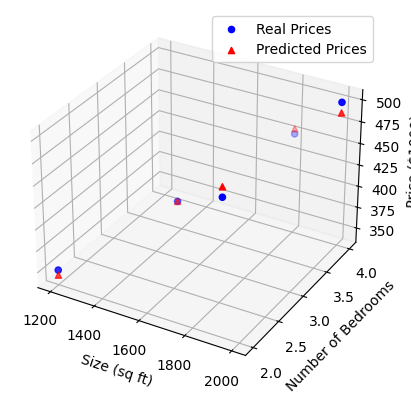

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Real-life data
size = np.array([1500, 1800, 1200, 2000, 1700]).reshape(-1, 1)  # Feature 1: Size in square feet
bedrooms = np.array([3, 4, 2, 4, 3]).reshape(-1, 1)  # Feature 2: Number of bedrooms
price = np.array([400, 450, 350, 500, 420]).reshape(-1, 1)  # Label: Price in $1000

# Combine features into one matrix
X = np.hstack([size, bedrooms])

# Train the regression model
model = LinearRegression()
model.fit(X, price)

# Make predictions
price_pred = model.predict(X)

# Visualize in 3D space
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(size, bedrooms, price, c='b', marker='o', label='Real Prices')
ax.scatter(size, bedrooms, price_pred, c='r', marker='^', label='Predicted Prices')

ax.set_xlabel('Size (sq ft)')
ax.set_ylabel('Number of Bedrooms')
ax.set_zlabel('Price ($1000)')
plt.legend()
plt.show()
